Classification of Images from the CIFAR-10 Dataset using ANN & CNN.


Import Tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Sample Images of dataset with corresponding labels

Load Dataset

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

Example training results: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'dog', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'deer']


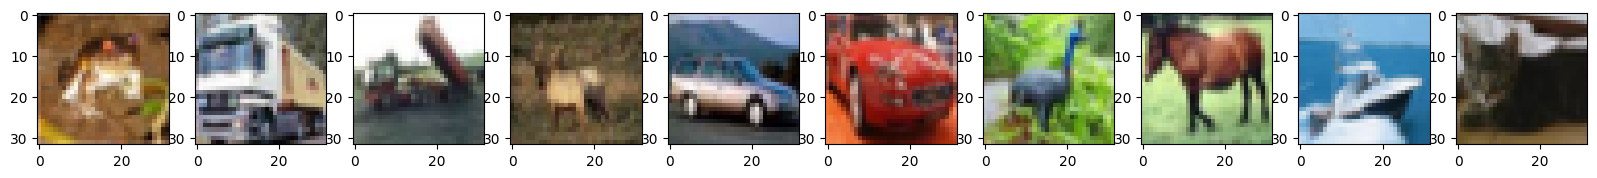

In [4]:
cifar10_classes= ['airplane', 'automobile', 'bird', 'deer', 'dog', 'cat', 'frog', 'horse', 'ship', 'truck']
print('Example training results: '+str([x[0] for x in y_train[0:10]]) )
print('Corresponding classes for the labels: '+str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1,10)
fig.set_size_inches(20,6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

Preparing the Dataset

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

MLP Netwrok

In [6]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [7]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(1024,activation='relu'))
ann.add(Dense(10,activation='softmax'))

In [8]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,157,002
Trainable params: 3,157,002
Non-trainable params: 0
_________________________________________________________________


In [9]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
history = ann.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8936 - accuracy: 0.3280 - val_loss: 1.6899 - val_accuracy: 0.4047
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6877 - accuracy: 0.3980 - val_loss: 1.6320 - val_accuracy: 0.4192
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6181 - accuracy: 0.4233 - val_loss: 1.5735 - val_accuracy: 0.4373
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5773 - accuracy: 0.4353 - val_loss: 1.5734 - val_accuracy: 0.4426
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5477 - accuracy: 0.4495 - val_loss: 1.5799 - val_accuracy: 0.4334
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5245 - accuracy: 0.4585 - val_loss: 1.5548 - val_accuracy: 0.4426
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5004 - accuracy: 0.4658 - val_loss: 1.5282 - val_accuracy:

Plotting our Training History

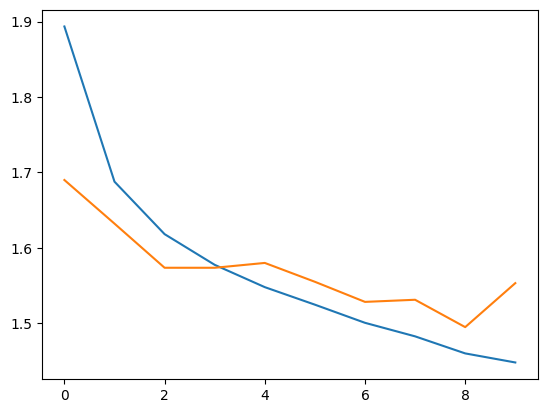

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

CNN Model

In [12]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [13]:
# cnn = keras.Sequential()
# cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))
# cnn.add(MaxPooling2D(2,2))
# cnn.add(Conv2D(64, kernel_size= (3,3), strides= (1,1), padding='same',activation='relu'))
# cnn.add(MaxPooling2D(2,2))
# cnn.add(Conv2D(128, kernel_size= (3,3), strides= (1,1), padding='same', activation='relu'))
# cnn.add(MaxPooling2D(2,2))
# cnn.add(Conv2D(256, kernel_size= (3,3), strides= (1,1), padding='same', activation='relu'))
# cnn.add(MaxPooling2D(2,2))
# cnn.add(Flatten())
# cnn.add(Dense(64,activation='relu'))
# cnn.add(Dropout(0.3))
# cnn.add(Dense(10,activation='softmax'))


cnn = keras.Sequential()
cnn.add(Conv2D(16, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(32, kernel_size= (3,3), strides= (1,1), padding='same',activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))
cnn.add(Conv2D(64, kernel_size= (3,3), strides= (1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

In [14]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)         

In [15]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history= cnn.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test), callbacks=[es])

Epoch 1/50
1563/1563 [==============================] - 14s 5ms/step - loss: 1.6864 - accuracy: 0.3788 - val_loss: 1.3492 - val_accuracy: 0.5131
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3847 - accuracy: 0.4976 - val_loss: 1.2099 - val_accuracy: 0.5725
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2481 - accuracy: 0.5522 - val_loss: 1.0724 - val_accuracy: 0.6209
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1502 - accuracy: 0.5910 - val_loss: 0.9949 - val_accuracy: 0.6518
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0828 - accuracy: 0.6160 - val_loss: 0.9362 - val_accuracy: 0.6701
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0360 - accuracy: 0.6324 - val_loss: 0.8935 - val_accuracy: 0.6919
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9935 - accuracy: 0.6487 - val_loss: 0.8711 - val_accuracy

In [16]:
def plotLosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

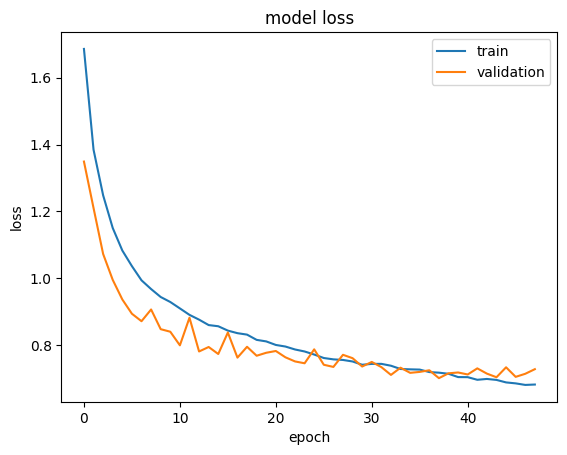

In [17]:
plotLosses(history)

In [18]:
def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

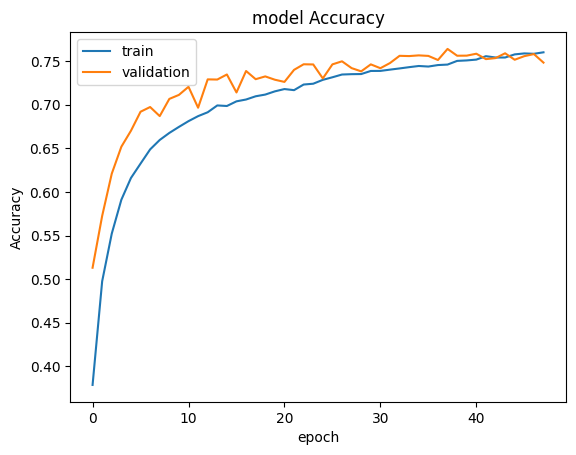

In [19]:
plotAccuracy(history)

In [20]:
score = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7275 - accuracy: 0.7482


In [21]:
print(cnn.metrics_names)
print(score)

['loss', 'accuracy']
[0.7274885773658752, 0.748199999332428]


In [22]:
from keras.models import load_model
cnn.save('cnn_model.h5')

In [23]:
model = tf.keras.models.load_model('cnn_model.h5')

In [24]:
import numpy as np
x_test_sample = np.expand_dims(x_test[20], axis=0)
model.predict(x_test_sample)

1/1 [==============================] - 0s 326ms/step


array([[6.3873522e-05, 3.6828918e-04, 5.3459906e-05, 1.2940131e-04,
        3.1950834e-04, 4.8590952e-04, 3.4968136e-07, 9.9249226e-01,
        2.6512457e-06, 6.0844291e-03]], dtype=float32)

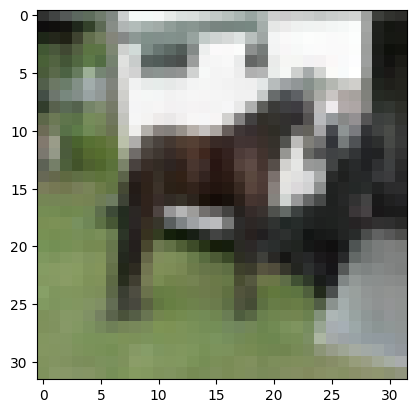

In [25]:
plt.imshow(x_test[20])

In [26]:
class_names = ['airplane', 'automobile', 'bird', 'deer', 'dog', 'cat', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(x_test_sample)
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]
print(f"The predicted class is: {predicted_class_name}")

1/1 [==============================] - 0s 16ms/step
The predicted class is: horse
